In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main

## Flow

In [29]:
# flow_all_close, speed_all_close, occupancy_all_close, flow_dt_close, speed_dt_close, occupancy_dt_close = data_loader_main(csv_dict='Sim_Results/Ramp_Close')
flow_all_open, speed_all_open, occupancy_all_open, flow_dt_open, speed_dt_open, occupancy_dt_open = data_loader_main(csv_dict='Sim_Results/Ramp_Open')
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA, flow_dt_ALIANA, speed_dt_ALIANA, occupancy_dt_ALIANA = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_MPC, speed_all_MPC, occupancy_all_MPC, flow_dt_MPC, speed_dt_MPC, occupancy_dt_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_MPC')
flow_all_MPC_R, speed_all_MPC_R, occupancy_all_MPC_R, flow_dt_MPC_R, speed_dt_MPC_R, occupancy_dt_MPC_R = data_loader_main(csv_dict='Sim_Results/Ramp_MPCRefine')

In [30]:
control_input_ALIANA = pd.read_csv('Results/Meter_Rate_ALIANA.csv')
control_input_MPC_R = pd.read_csv('Results/Meter_Rate_MPCRefine.csv')

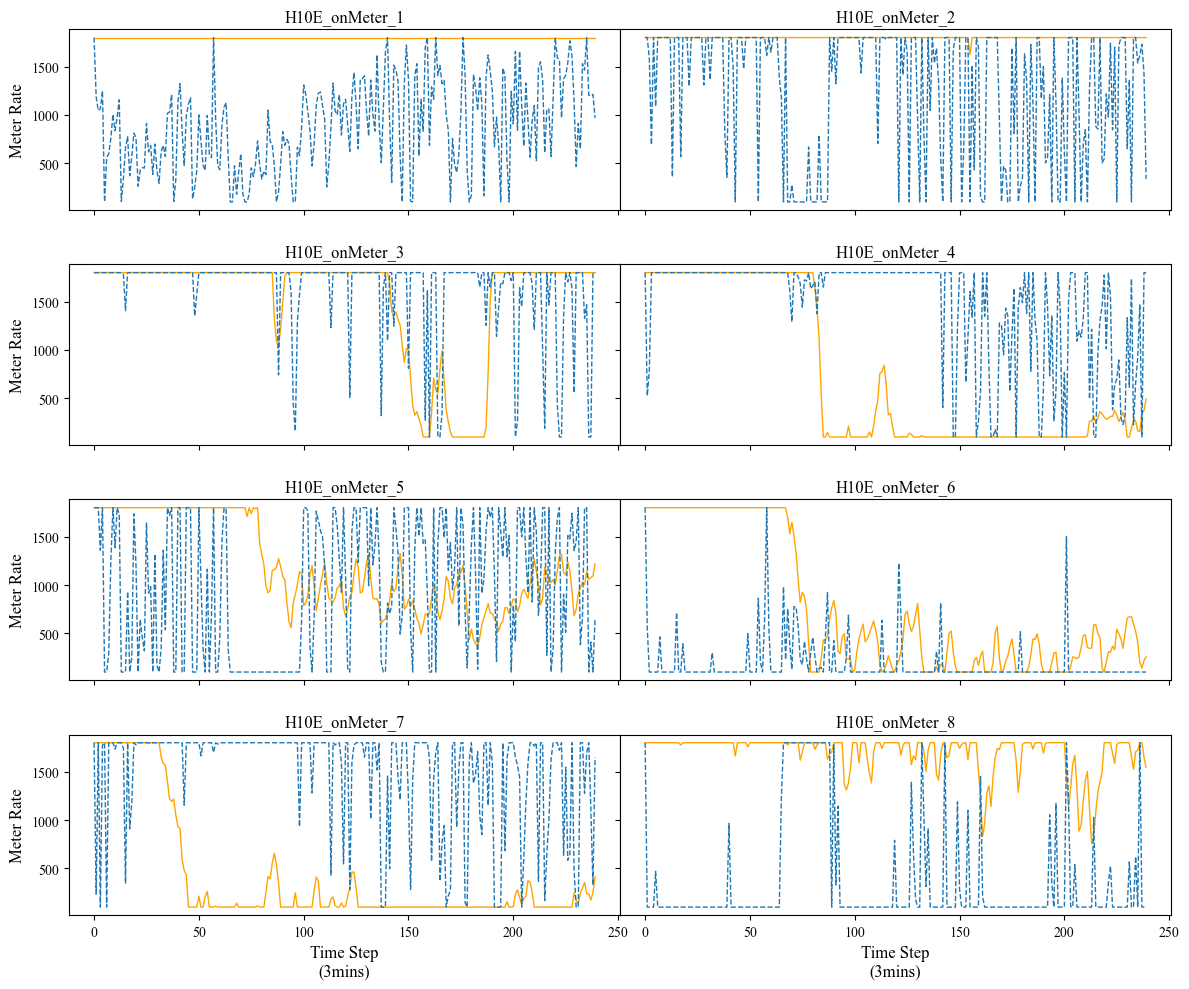

In [31]:
plt.show()
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 10), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        axs[row, col].plot(control_input_ALIANA.iloc[:, index], "-", label='ALIANA', c='orange',linewidth=1)
        axs[row, col].plot(control_input_MPC_R.iloc[:, index], "--", label='SINDy-MPC-R',linewidth=1)
        axs[row, col].set_title(control_input_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[3, col].set_xlabel('Time Step\n(3mins)', fontsize=12)

for row in range(4):
    axs[row, 0].set_ylabel('Meter Rate', fontsize=12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Ramp_Rate.png', dpi=300)

In [32]:
# moving average
window_size = 3
flow_all_open = flow_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

flow_all_ALIANA = flow_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

flow_all_MPC = flow_all_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

flow_all_MPC_R = flow_all_MPC_R.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_open = occupancy_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_ALIANA = occupancy_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_MPC = occupancy_all_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_MPC_R = occupancy_all_MPC_R.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()


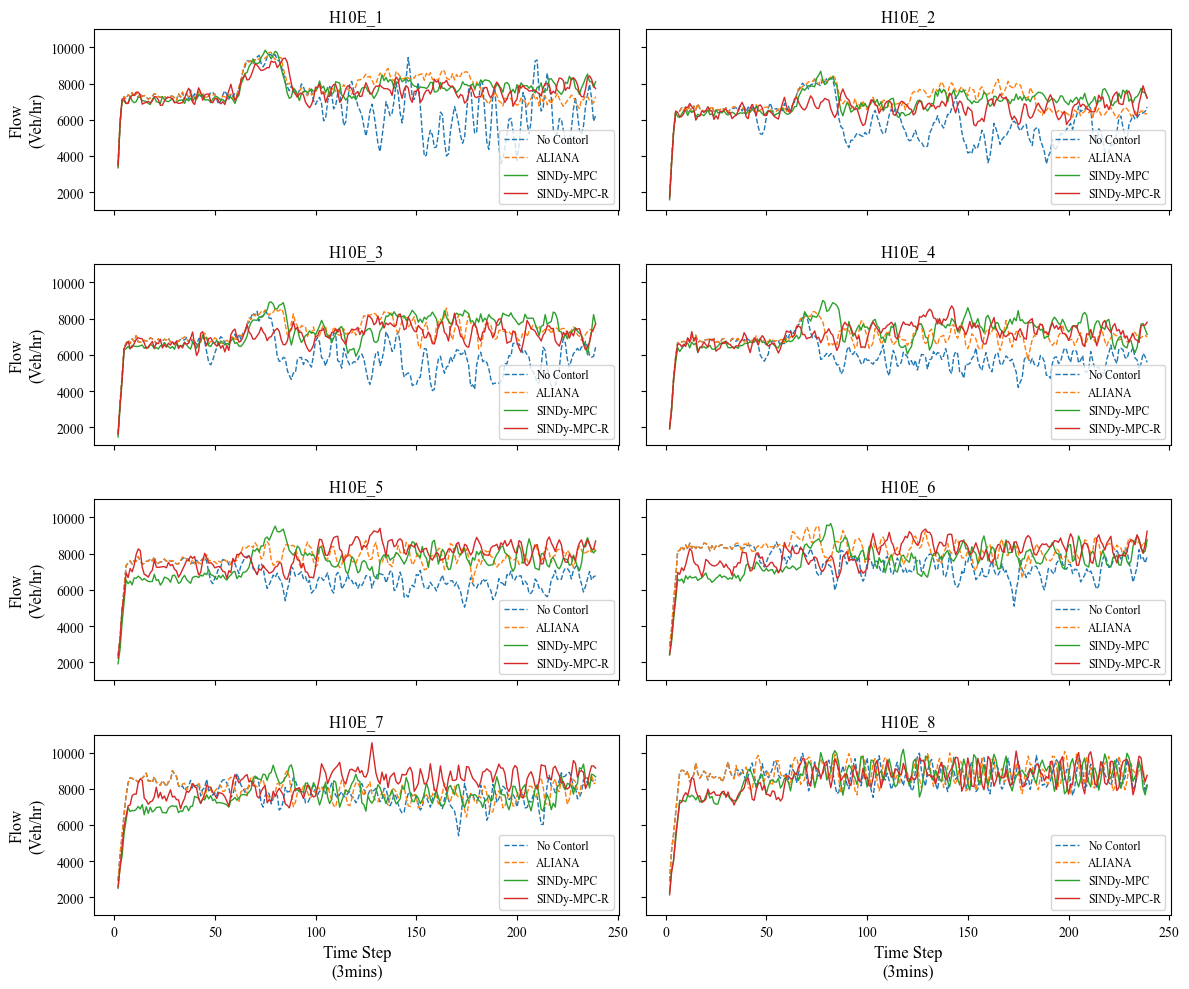

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 10), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        #axs[row, col].plot(flow_all_close.iloc[:, index], "-", label = 'Ramp Close')
        axs[row, col].plot(flow_all_open.iloc[:, index], "--", label = 'No Contorl',linewidth=1)
        axs[row, col].plot(flow_all_ALIANA.iloc[:, index], "--", label = 'ALIANA',linewidth=1)
        axs[row, col].plot(flow_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC',linewidth=1)
        axs[row, col].plot(flow_all_MPC_R.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        axs[row, col].legend(loc='lower right', fontsize='small')
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[3,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(4):
    axs[row,0].set_ylabel('Flow\n(Veh/hr)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Flow_Plot.png', dpi=300)

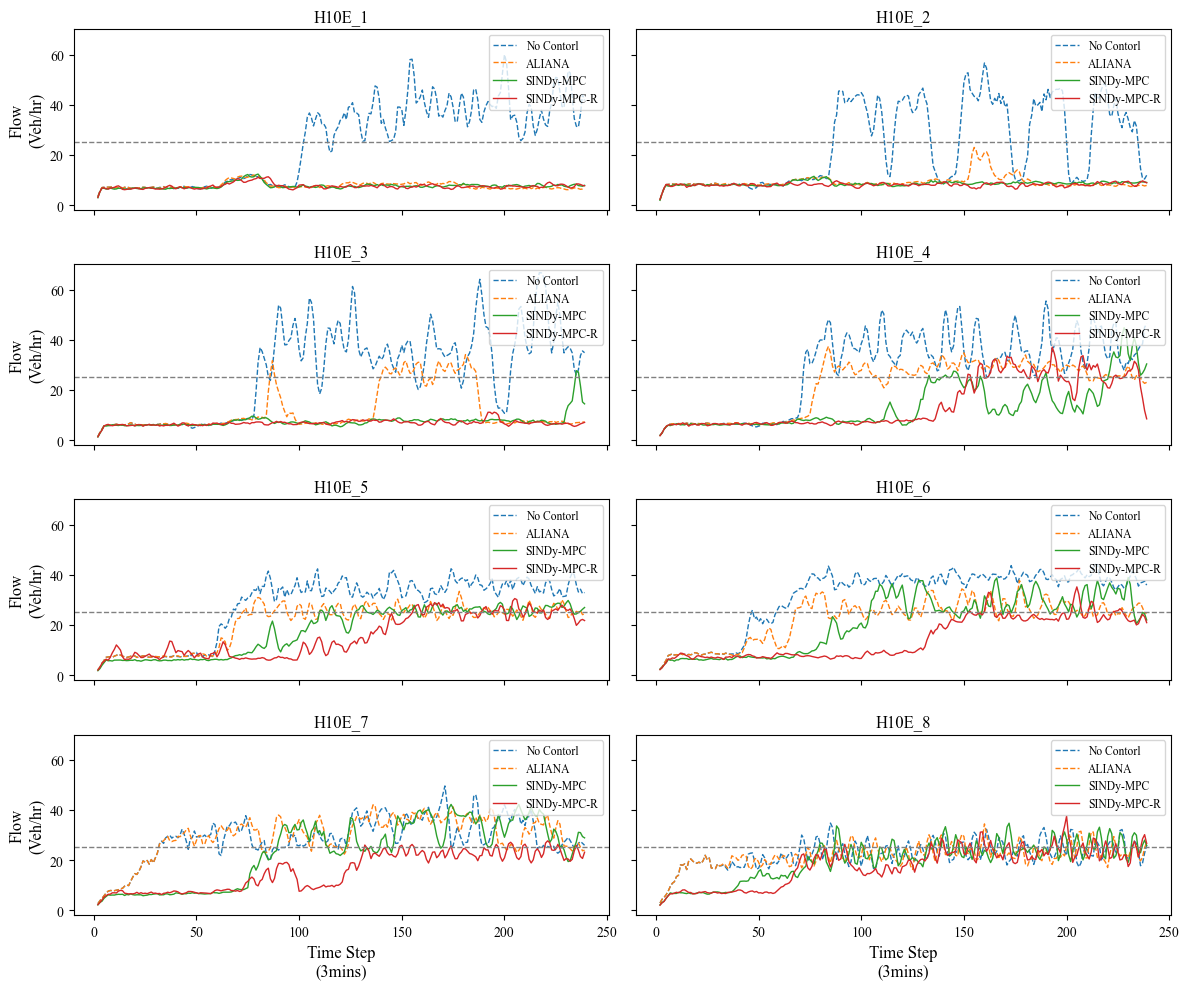

In [36]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 10), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        #axs[row, col].plot(flow_all_close.iloc[:, index], "-", label = 'Ramp Close')
        axs[row, col].plot(occupancy_all_open.iloc[:, index], "--", label = 'No Contorl',linewidth=1)
        axs[row, col].plot(occupancy_all_ALIANA.iloc[:, index], "--", label = 'ALIANA',linewidth=1)
        axs[row, col].plot(occupancy_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC',linewidth=1)
        axs[row, col].plot(occupancy_all_MPC_R.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].axhline(y=25, color='gray', linestyle='--', linewidth=1)  # Adding horizontal dashed line
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[3,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(4):
    axs[row,0].set_ylabel('Flow\n(Veh/hr)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Occu_Plot.png', dpi=300)